In [4]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
 
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs
 
# 数据集的生成，利用np来生成-1~2的300个点
x_data = np.linspace(-1, 2, num=300)[:, np.newaxis]
# 添加噪音
noise = np.random.normal(0, 0.05, x_data.shape)
# 计算Y轴的值
y_data = np.square(x_data) - 0.5 + noise
 
# 添加占位符
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
 
# 添加隐藏层
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# 添加输出层
prediction = add_layer(l1, 10, 1, activation_function=None)
# 由此生成了两层神经网络
 
# 计算误差，并用梯度下降使得误差最小
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
 
# important step
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

    
#writer = tf.train.SummaryWriter("logs/", sess.graph)

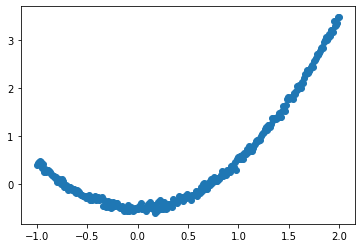

In [5]:
# 画出原始值
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()
lines = None
time.sleep(4)
# 显示拟合
for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    try:
            ax.lines.remove(lines[0])
    except Exception:
        pass
    prediction_value = sess.run(prediction, feed_dict={xs: x_data})
    lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
    plt.pause(0.1)